In [1]:
import numpy as np

In [2]:
import cc.atlas as atlas
import cc.cartography as cartography

In [3]:
import matplotlib
import matplotlib.pyplot as plt

# Load Data

In [4]:
fp = '../data/realistic_atlas/projection_for_testing.h5'
c = cartography.Cartographer.from_hdf5( fp )

/Users/zhafen/repos/verdict/verdict.py:1410: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if hasattr( a[first_element_index][0], 'decode' ):


# Generate Map

### Preserving Pairwise Distances

In [5]:
x_key = 'Hafen2019'

In [6]:
coords, inds, pairs = c.map(
    x_key,
)

/Users/zhafen/repos/cc/cc/cartography.py:1264: RuntimeWarning: invalid value encountered in arccos
  d_matrix = np.arccos( self.cospsi_matrix )


Sorting....


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3877/3877 [00:00<00:00, 9108.27it/s]


1%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


### Just similarity between two central publications

In [7]:
np.random.seed( 1234 )

In [8]:
y_key = np.random.choice( c.publications )

In [9]:
x = c.cospsi( x_key, 'all' )
y = c.cospsi( y_key, 'all' )
simple_coords = np.array([ x, y ]).transpose()

In [10]:
simple_inds = np.argsort( x )[::-1]

In [11]:
simple_pairs = None

### For coloring the maps

In [12]:
keys = [ x_key, y_key ]
colors = [ c.cospsi( _, 'all' ) for _ in keys ]

In [13]:
vlim = [ 0., 0.4 ]

# Plot

## Scatter

### Big Picture

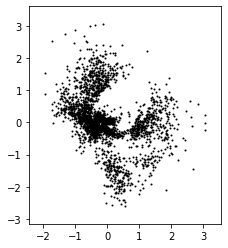

In [14]:
fig = plt.figure()
ax = plt.gca()

ax, (coords0, inds0, pairs0) = c.plot_map(
    x_key,
    coords = coords,
    ax = ax,
    scatter_kwargs = { 's': 1 },
)

### Zoomed In

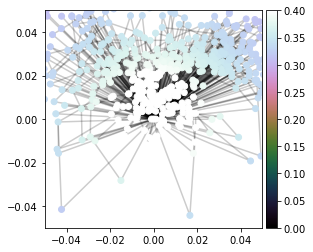

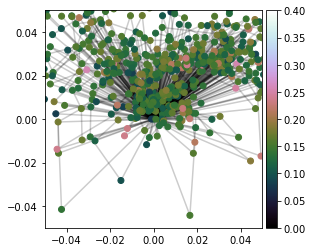

In [15]:
for i, key in enumerate( keys ):

    fig = plt.figure()
    ax = plt.gca()

    ax, (coords0, inds0, pairs0) = c.plot_map(
        key,
        coords = coords,
        pairs = pairs,
        colors = colors[i],
        ax = ax,
        xlim = [ -0.05, 0.05 ],
        ylim = [ -0.05, 0.05 ],
        vlim = vlim,
        links = True,
    )

## Histogram

### Big Picture

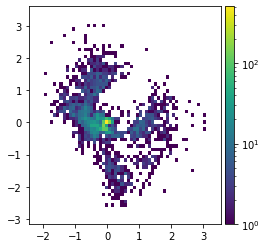

In [16]:
fig = plt.figure()
ax = plt.gca()

ax, (coords0, inds0, pairs0) = c.plot_map(
    x_key,
    coords = coords,
    ax = ax,
    scatter = False,
    histogram = True,
    cmap = 'viridis',
)

### Big Picture Colored

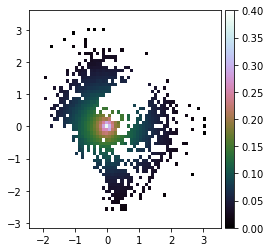

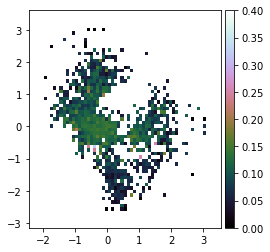

In [20]:
for i, key in enumerate( keys ):

    fig = plt.figure()
    ax = plt.gca()

    ax, (coords0, inds0, pairs0) = c.plot_map(
        x_key,
        coords = coords,
        colors = colors[i],
        ax = ax,
        scatter = False,
        histogram = True,
        vlim = vlim,
    )

### Zoomed In

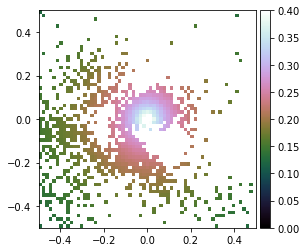

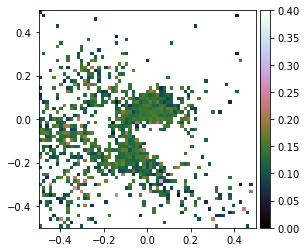

In [18]:
for i, key in enumerate( keys ):

    fig = plt.figure()
    ax = plt.gca()

    ax, (coords0, inds0, pairs0) = c.plot_map(
        key,
        coords = coords,
        inds = inds,
        pairs = pairs,
        colors = colors[i],
        ax = ax,
        scatter = False,
        histogram = True,
        xlim = [ -0.5, 0.5 ],
        ylim = [ -0.5, 0.5 ],
        vlim = vlim,
    )

In [19]:
hatching = np.array([ '//' if _ else None for _ in np.random.randint( 0, 2, colors[0].size ).astype( 'bool' )  ])